Problem Statement: Classification on the ’credit-g’ dataset.

Key points to cover:

• Determine the continuous and categorical features.

• Visualize the univariate distribution of each continuous variable, and the distribution of the target.

• Preprocessing and Splitting the dataset.

• Encoding categorical variables.

• Applying the Logistic Regression, Linear SupportVector Machines and nearest neighbors Algorithms

In [ ]:
from scipy.io import arff
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import sys
import seaborn as sns

%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing 
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

### Software details for the running machine and versions

In [ ]:
print('Python Version: {}'.format(sys.version))
print('Numpy Version: {}'.format(np.__version__))
print('Pandas Version: {}'.format(pd.__version__))

Python Version: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
Numpy Version: 1.21.5
Pandas Version: 1.4.3


## Loading the DataSet

In [ ]:
data = arff.loadarff('../data/dataset_31_credit-g.arff')
CreditGdataFrame = pd.DataFrame(data[0])
CreditGdataFrame.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


In [ ]:
CreditGdataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

## Decoding data formats in the DF to UTF8

In [ ]:
def removebyte(CreditGdataFrame):
    for col in list(CreditGdataFrame):
        if CreditGdataFrame[col].dtype != "float64":
            CreditGdataFrame[col] = CreditGdataFrame[col].apply(lambda x: x.decode('utf-8')) 
    return CreditGdataFrame
removebyte(CreditGdataFrame)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [ ]:
CreditGdataFrame.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [ ]:
CreditGdataFrame.tail()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad
999,0<=X<200,45.0,critical/other existing credit,used car,4576.0,100<=X<500,unemployed,3.0,male single,none,...,car,27.0,none,own,1.0,skilled,1.0,none,yes,good


### Printing the statistical properties of the numerical features from the dataset

In [ ]:
CreditGdataFrame.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
CreditGdataFrame.dtypes

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object

## Data Description for the data
- Total Records = 1000
- Total number of Features = 21
- Data Types:
    - Integer - 0
    - Float - 7
    - Object - 14

In [ ]:
CreditGdataFrame.shape

(1000, 21)

## Checking for Missing Values

In [ ]:
CreditGdataFrame.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

### Feature Descriptions as per the dataset providers

Status of the existing checking account, in Deutsche Mark.

Duration in months

Credit history (credits taken, paid back duly, delays, critical accounts)

Purpose of the credit (car, television,...)

Credit amount

Status of savings account/bonds, in Deutsche Mark.

Present employment, in number of years.

Installment rate in percentage of disposable income

Personal status (married, single,...) and sex

Other debtors / guarantors

Present residence since X years

Property (e.g. real estate)

Age in years

Other installment plans (banks, stores)

Housing (rent, own,...)

Number of existing credits at this bank

Job

Number of people being liable to provide maintenance for

Telephone (yes,no)

Foreign worker (yes,no)

## Figuring out the Continuous Vs Categorical Features

In [ ]:
ContinuousFeatures = [col for col in CreditGdataFrame.columns if CreditGdataFrame[col].dtype in ['float64','int64']]

CategoricalFeatures = [col for col in CreditGdataFrame.columns if CreditGdataFrame[col].dtype not in ['float64','int64']]

print("ContinuousFeatures = ",ContinuousFeatures)
print("CategoricalFeatures = ",CategoricalFeatures)

ContinuousFeatures =  ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
CategoricalFeatures =  ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class']


##  Continuous Features Histogram

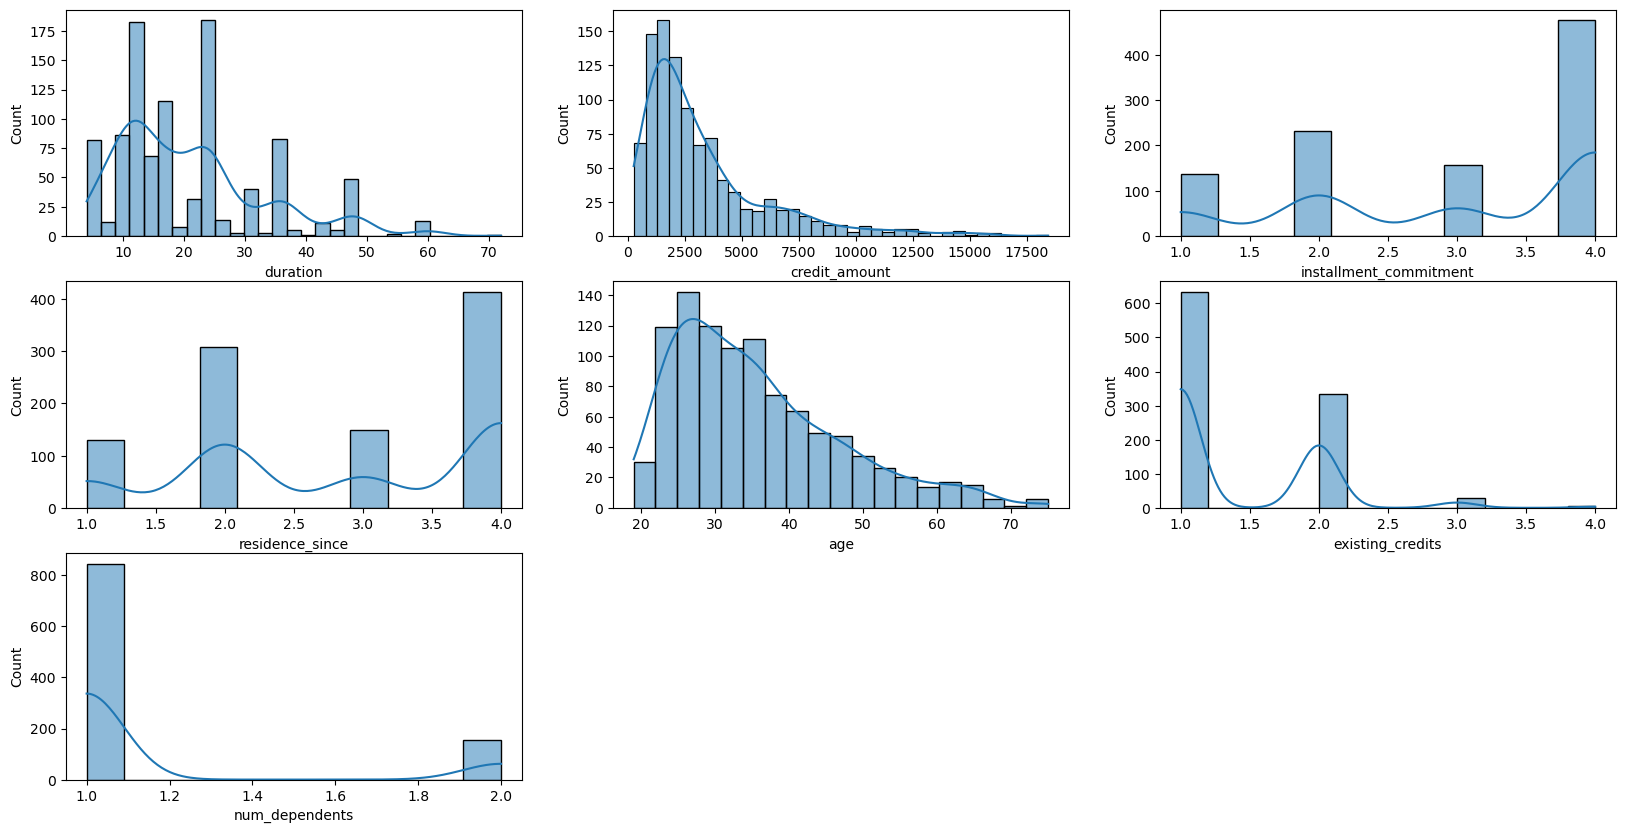

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(20,10))
c = 0
for i in range(3):
    for j in range(3):
        if c == 7:
            break
        sns.histplot(ax = ax[i][j], x = CreditGdataFrame[ContinuousFeatures[c]], kde=True)
        c += 1
fig.delaxes(ax= ax[2,1])
fig.delaxes(ax= ax[2,2])
plt.show()

##  Class dependency scatter plot for Continuous Features

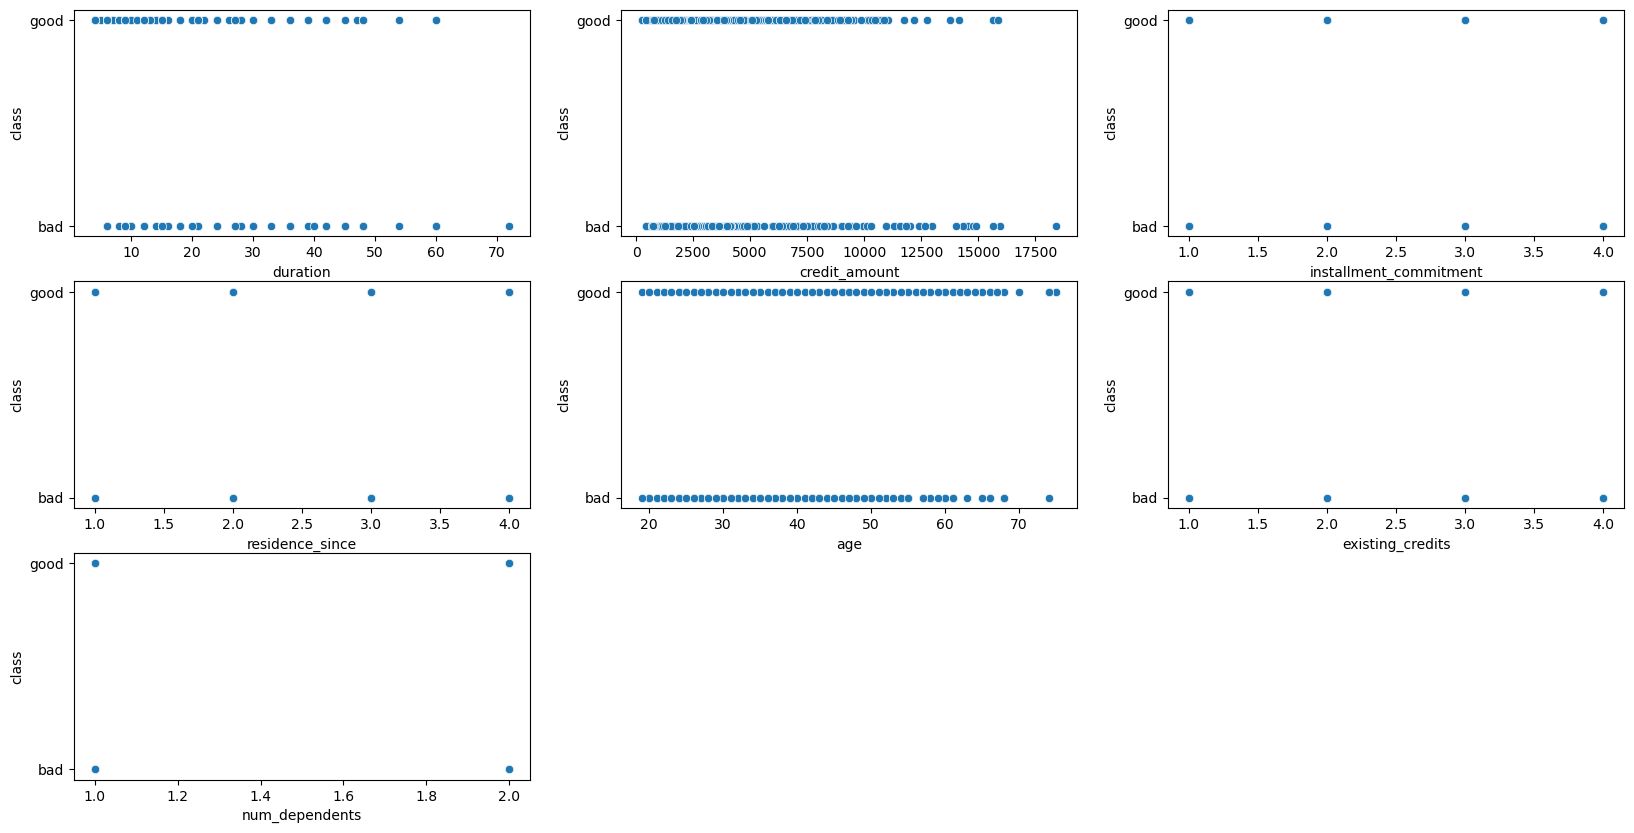

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(20,10))
c = 0
for i in range(3):
    for j in range(3):
        if c == 7:
            break
        sns.scatterplot(ax = ax[i][j], x = CreditGdataFrame[ContinuousFeatures[c]], y = CreditGdataFrame['class'])
        c += 1
fig.delaxes(ax= ax[2,1])
fig.delaxes(ax= ax[2,2])

### Plotting the Corelation matrix to isolate the useful features and use them for visualization

<AxesSubplot:>

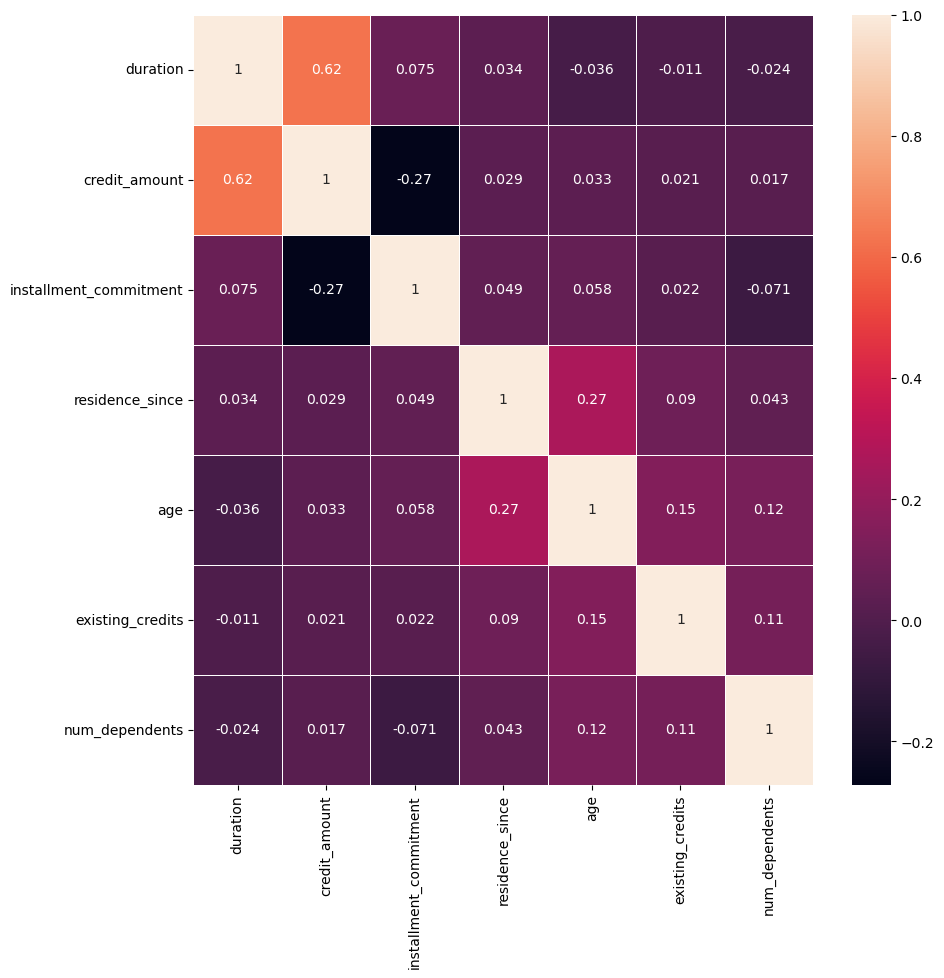

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(CreditGdataFrame.corr(),annot=True,linewidths=.5)

## Using LabelEncoder() for encoding the Categorical 

### We are using the labelEncoder instead of the ColumnTransformer just for the purpose of simplicity as the code is much cleaner however here is an alternative implemetation: 

In [ ]:
'''
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[0])],remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
'''

"\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OneHotEncoder\nct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[0])],remainder = 'passthrough')\nX = np.array(ct.fit_transform(X))\n"

In [ ]:
model = CreditGdataFrame.copy()

In [ ]:
Y =  CreditGdataFrame["class"]

In [ ]:
data = CreditGdataFrame.drop("class", axis=1)
X = data

In [ ]:
X = model.apply(preprocessing.LabelEncoder().fit_transform)
Y =  X["class"]

In [ ]:
print(X.values[0])

[  1   2   1   6 142   4   3   3   3   2   3   3  48   1   1   1   1   0
   1   1   1]


In [ ]:
X = X.drop("class",axis =1 )

<AxesSubplot:>

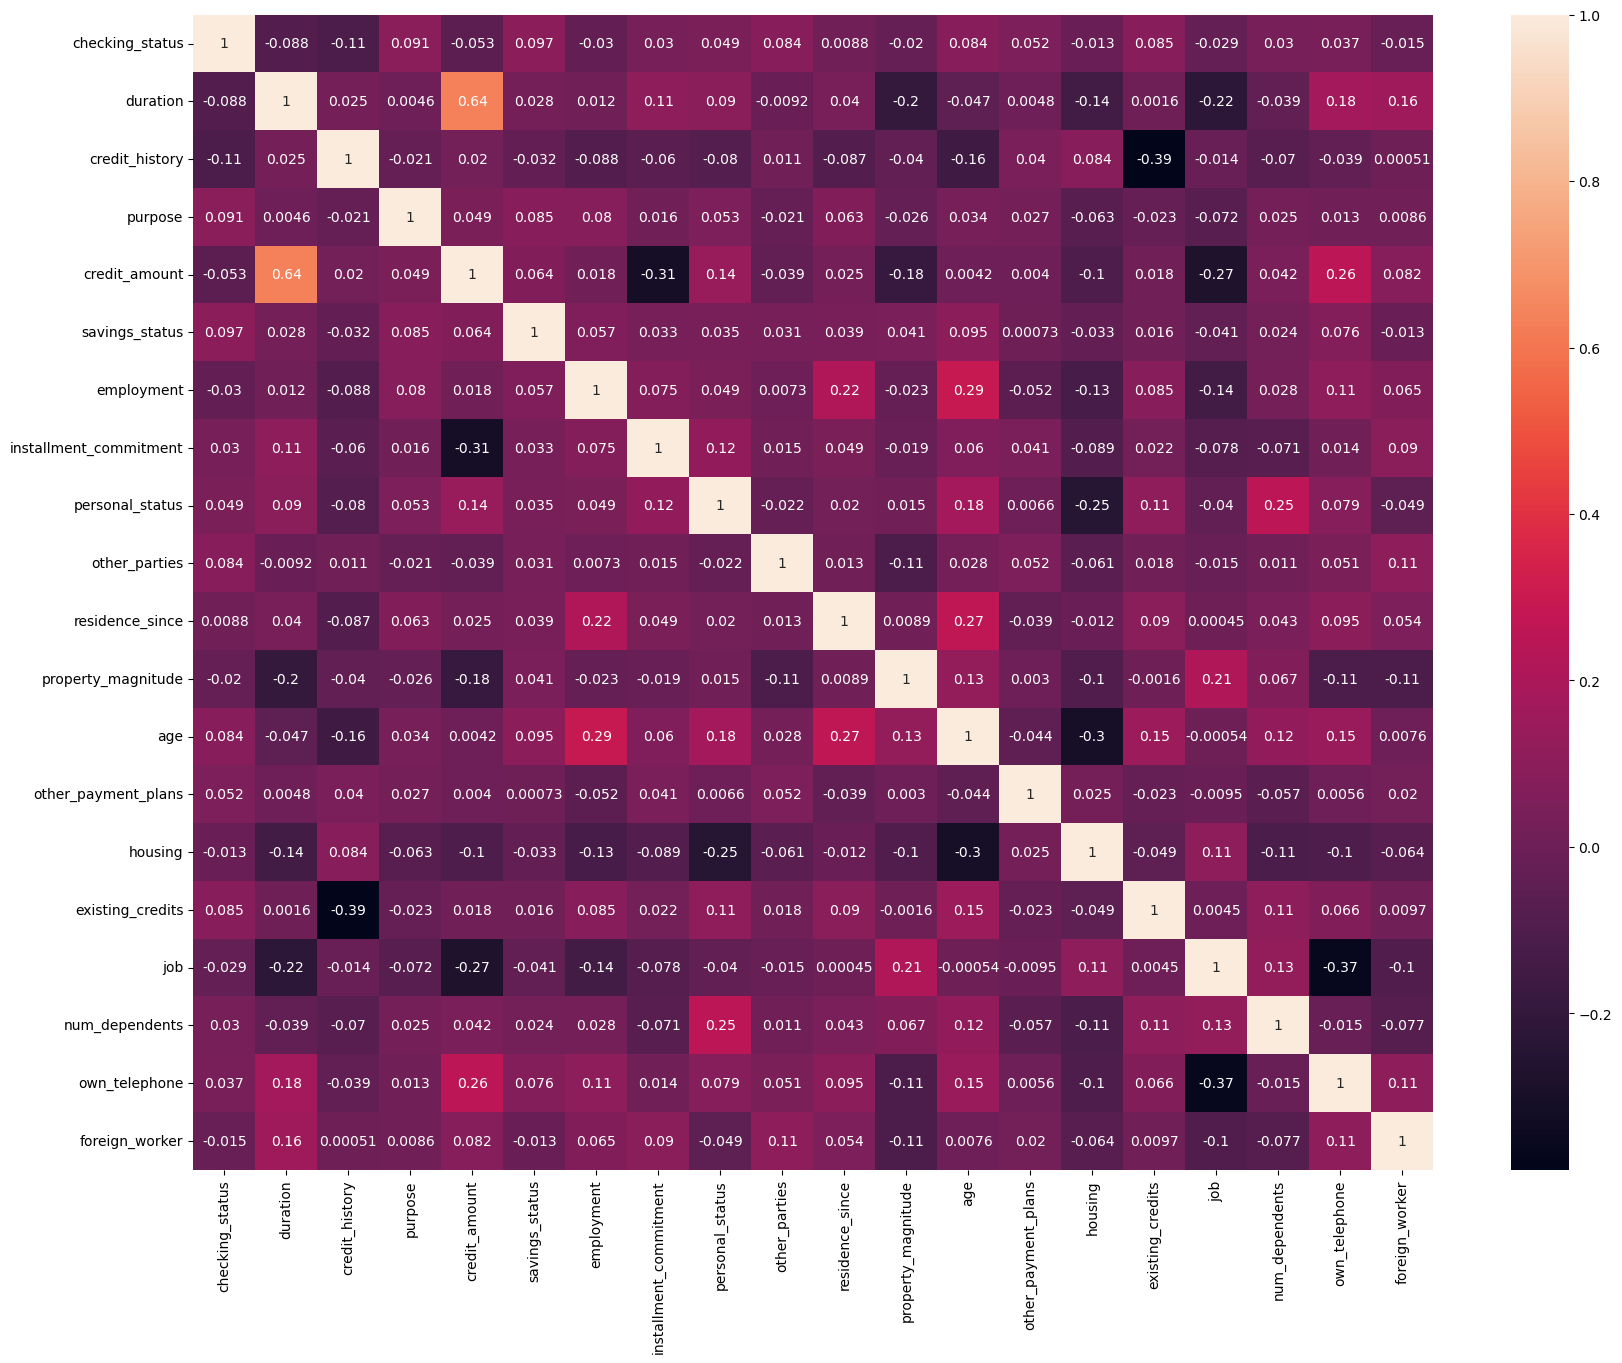

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(X.corr(),annot=True)

## Using the SelectKBest to select the 10 best features and drop rest

In [ ]:
selector = SelectKBest(score_func=f_regression, k=10).fit(X, Y)
f = selector.get_support(1)
X_new = X[X.columns[f]]


In [ ]:
X_new.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,installment_commitment,personal_status,age,foreign_worker
0,1,2,1,6,142,4,3,3,48,1
1,0,29,3,6,770,2,1,0,3,1
2,3,8,1,2,390,2,1,3,30,1
3,1,26,3,3,848,2,1,3,26,1
4,1,17,2,4,734,2,2,3,34,1


In [ ]:
X_values = X_new.values
print(len(X_values[0]))

10


In [ ]:
Y_values = Y.values

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(X_values, Y_values, test_size = 0.3, random_state=0)

## Predictions without Scaling

## Decision Tree Classification

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
DTClass = DecisionTreeClassifier(random_state=0,criterion="gini")
DTClass.fit(xTrain, yTrain)
print("Classifier Accuracy on test set: ", DTClass.score(xTest,yTest)*100)
scores = cross_val_score(DTClass, xTrain, yTrain, cv=skf, scoring='accuracy')
print(f'cross val Accuracy Score = {np.mean(scores)*100}')

Classifier Accuracy on test set:  65.66666666666666
cross val Accuracy Score = 65.99999999999999


In [ ]:
y_pred = DTClass.predict(xTest)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
DTClassCm = confusion_matrix(yTest, y_pred)
DTClassCm

array([[ 37,  49],
       [ 54, 160]], dtype=int64)

## Logistic Regression Classification

In [ ]:
LogRegClf = LogisticRegression(random_state = 0)
LogRegClf.fit(xTrain, yTrain)
print("Classifier Accuracy on test set: ", LogRegClf.score(xTest,yTest)*100)
scores = cross_val_score(LogRegClf, xTrain, yTrain, cv=skf, scoring='accuracy')
print(f'cross val Accuracy Score = {np.mean(scores)*100}')

Classifier Accuracy on test set:  73.0
cross val Accuracy Score = 70.28571428571429


D:\CodingSW\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\CodingSW\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
# Predicting the Test set results
y_pred = LogRegClf.predict(xTest)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
# Making the Confusion Matrix
LogRegClfCm = confusion_matrix(yTest, y_pred)
LogRegClfCm

array([[ 33,  53],
       [ 28, 186]], dtype=int64)

## SVM Classification

In [ ]:
SupportVecClf = SVC(kernel = 'linear', random_state = 0)
SupportVecClf.fit(xTrain, yTrain)
print("Classifier Accuracy on test set: ", SupportVecClf.score(xTest,yTest)*100)
scores = cross_val_score(SupportVecClf, xTrain, yTrain, cv=skf, scoring='accuracy')
print(f'cross val Accuracy Score = {np.mean(scores)*100}')

Classifier Accuracy on test set:  73.33333333333333
cross val Accuracy Score = 72.71428571428572


In [ ]:
# Predicting the Test set results
y_pred = SupportVecClf.predict(xTest)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
# Making the Confusion Matrix
SupportVecClfCm = confusion_matrix(yTest, y_pred)
SupportVecClfCm

array([[ 26,  60],
       [ 20, 194]], dtype=int64)

## KNN Classification

In [ ]:
KNNClf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNNClf.fit(xTrain, yTrain)
print("Classifier Accuracy on test set: ", KNNClf.score(xTest,yTest)*100)
scores = cross_val_score(KNNClf, xTrain, yTrain, cv=skf, scoring='accuracy')
print(f'cross val Accuracy Score = {np.mean(scores)*100}')

Classifier Accuracy on test set:  65.0
cross val Accuracy Score = 67.0


In [ ]:
# Predicting the Test set results
y_pred = KNNClf.predict(xTest)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1])

In [ ]:
# Making the Confusion Matrix
KNNClfCm = confusion_matrix(yTest, y_pred)
KNNClfCm

array([[ 25,  61],
       [ 44, 170]], dtype=int64)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xTrain = sc.fit_transform(xTrain)
xTest = sc.transform(xTest)

## Predictions with Scaling

## Decision Tree Classification

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
DTClass = DecisionTreeClassifier(random_state=0,criterion="gini")
DTClass.fit(xTrain, yTrain)
print("Classifier Accuracy on test set: ", DTClass.score(xTest,yTest)*100)
scores = cross_val_score(DTClass, xTrain, yTrain, cv=skf, scoring='accuracy')
print(f'cross val Accuracy Score = {np.mean(scores)*100}')

Classifier Accuracy on test set:  65.66666666666666
cross val Accuracy Score = 66.71428571428571


In [ ]:
y_pred = DTClass.predict(xTest)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
DTClassCm = confusion_matrix(yTest, y_pred)
DTClassCm

array([[ 38,  48],
       [ 55, 159]], dtype=int64)

## Logistic Regression Classification

In [ ]:
LogRegClf = LogisticRegression(random_state = 0)
LogRegClf.fit(xTrain, yTrain)
print("Classifier Accuracy on test set: ", LogRegClf.score(xTest,yTest)*100)
scores = cross_val_score(LogRegClf, xTrain, yTrain, cv=skf, scoring='accuracy')
print(f'cross val Accuracy Score = {np.mean(scores)*100}')

Classifier Accuracy on test set:  73.66666666666667
cross val Accuracy Score = 71.14285714285715


In [ ]:
# Predicting the Test set results
y_pred = LogRegClf.predict(xTest)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
# Making the Confusion Matrix
LogRegClfCm = confusion_matrix(yTest, y_pred)
LogRegClfCm

array([[ 34,  52],
       [ 27, 187]], dtype=int64)

## SVM Classification

In [ ]:
SupportVecClf = SVC(kernel = 'linear', random_state = 0)
SupportVecClf.fit(xTrain, yTrain)
print("Classifier Accuracy on test set: ", SupportVecClf.score(xTest,yTest)*100)
scores = cross_val_score(SupportVecClf, xTrain, yTrain, cv=skf, scoring='accuracy')
print(f'cross val Accuracy Score = {np.mean(scores)*100}')

Classifier Accuracy on test set:  73.66666666666667
cross val Accuracy Score = 71.42857142857143


In [ ]:
# Predicting the Test set results
y_pred = SupportVecClf.predict(xTest)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
# Making the Confusion Matrix
SupportVecClfCm = confusion_matrix(yTest, y_pred)
SupportVecClfCm

array([[ 26,  60],
       [ 19, 195]], dtype=int64)

## KNN Classification

In [ ]:
KNNClf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNNClf.fit(xTrain, yTrain)
print("Classifier Accuracy on test set: ", KNNClf.score(xTest,yTest)*100)
scores = cross_val_score(KNNClf, xTrain, yTrain, cv=skf, scoring='accuracy')
print(f'cross val Accuracy Score = {np.mean(scores)*100}')

Classifier Accuracy on test set:  71.66666666666667
cross val Accuracy Score = 69.71428571428572


In [ ]:
# Predicting the Test set results
y_pred = KNNClf.predict(xTest)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
# Making the Confusion Matrix
KNNClfCm = confusion_matrix(yTest, y_pred)
KNNClfCm

array([[ 31,  55],
       [ 30, 184]], dtype=int64)

## From the results of the predictions we can say that scaling does improve the results of the classification in most cases by a small percentage:-

#### Avg case accuracy values, may differ on runtime
- DTClass: 
    - Reg Accuracy  65.666-->65.6666
    - Cross Val Accuracy  66.285-->67.428
- LogRegClfCm: 
    - Reg Accuracy  73-->73.6666
    - Cross Val Accuracy  71.142-->71.428
- SupportVecClfCm: 
    - Reg Accuracy  73.333-->73.666
    - Cross Val Accuracy  72-->72.428
- KNNClfCm: 
    - Reg Accuracy  65.0-->71.666
    - Cross Val Accuracy  65.57--> 70.571

## However, for Decision Tree algorithm we dont see that much improvement as it is indifferent to scaling problems